# Anti Money Laundering (AML) Fraud Detection


        Life cycle of Machine Learning Project:

            1. Understanding the Problem Statement

            2. Data Collection

            3. Data Checks to perform

            4. Exploratory Data Analysis

            5. Data Pre-Processing

            6. Model Evaluation and Training

            7. Choose Best Model


## 1. Problem Statement

Money laundering is a multi-billion dollar issue. Detection of laundering is very difficult. Most automated algorithms have a high false positive rate: legitimate transactions incorrectly flagged as laundering. The converse is also a major problem -- false negatives, i.e. undetected laundering transactions. Naturally, criminals work hard to cover their tracks.

Access to real financial transaction data is highly restricted -- for both proprietary and privacy reasons. Even when access is possible, it is problematic to provide a correct tag (laundering or legitimate) to each transaction -- as noted above. This synthetic transaction data from IBM avoids these problems.

The data provided here is based on a virtual world inhabited by individuals, companies, and banks.

## 2. Data Collection
- Data source: https://www.kaggle.com/datasets/ealtman2019/ibm-transactions-for-anti-money-laundering-aml/data

### 2.1 Import Required Packages

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

### 2.2 Import Data

In [2]:
import os
# Get the current working directory
cwd = os.getcwd()
print(cwd)

# Navigate to the data folder
data_folder = os.path.abspath(os.path.join(cwd, "data"))
print(data_folder)

csv_file = os.path.join(data_folder, "HI-Small_Trans.csv")
print(csv_file)

c:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\01 - MLOps\AML-Fraud-Detection\notebook
c:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\01 - MLOps\AML-Fraud-Detection\notebook\data
c:\Users\yrobi\Desktop\Robin World\Data Science - Machine Learning Prep\01 - MLOps\AML-Fraud-Detection\notebook\data\HI-Small_Trans.csv


In [3]:
# Load the CSV file into a pandas DataFrame
aml_trans_df = pd.read_csv(csv_file)
# display(aml_trans_df.head())
print(f"Shape of data:  \n No. of records: {aml_trans_df.shape[0]} \n No. features: {aml_trans_df.shape[1]}")

Shape of data:  
 No. of records: 5078345 
 No. features: 11


In [4]:
# Take small sample of data from the original data
aml_trans_sm_df = aml_trans_df.sample(n=50000, random_state=6)
print(f"Shape of data:  \n No. of records: {aml_trans_sm_df.shape[0]} \n No. features: {aml_trans_sm_df.shape[1]}")

Shape of data:  
 No. of records: 50000 
 No. features: 11


#### Show Top 5 records

In [5]:
aml_trans_sm_df.head()

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3507139,2022/09/07 12:15,29,80CF063F0,235843,80CFE1EB0,386006.86,Brazil Real,386006.86,Brazil Real,Cheque,0
2054082,2022/09/03 21:15,70,100428660,22732,80BFEBFF0,8638.95,US Dollar,8638.95,US Dollar,Cheque,0
4745576,2022/09/09 19:22,338871,8144F97F0,15964,8144FEB20,80.84,Euro,80.84,Euro,Credit Card,0
1999193,2022/09/03 14:11,70,1004286A8,1502,812191060,46480.59,Euro,46480.59,Euro,Cheque,0
800550,2022/09/01 14:46,1,803A2CC10,130342,80C982930,118.46,US Dollar,118.46,US Dollar,Cheque,0


### 2.2 Dataset Information

- `Timestamp` - Year/Month/Day Hour/Minute
- `From Bank` - Numeric code for bank where transaction originates
- `Account` - Hexadecimal code for account where transaction originates
- `To Bank` - Numeric code for bank where transaction ends
- `Account.1` - Hexadecimal code for account where transaction ends
- `Amount Received` - Monetary amount received in From account (in currency units of the next column)
- `Receiving Currency` - Currency such as dollars, euros, etc of From account
- `Amount Paid` - Monetary amount paid (in currency units of the next column)
- `Payment Currency` - Currency such as dollars, euros, etc of From account
- `Payement Format` - How transaction was conducted, e.g. cheque, ACH, wire, credit cards, etc.
- `Is Laundering` - Target variable

## 3 Data Checks to perform
- Check Duplicates
- Check Missing Values
- Check Data Types
- Check the number of unique values of each column
- Check Statitics of Data
- Check various categories present in the different column

### 3.1 Check Duplicates

In [6]:
aml_trans_sm_df.duplicated(keep="first").sum()

0

### 3.2 Check Missing values

In [7]:
aml_trans_sm_df.isna().sum()

Timestamp             0
From Bank             0
Account               0
To Bank               0
Account.1             0
Amount Received       0
Receiving Currency    0
Amount Paid           0
Payment Currency      0
Payment Format        0
Is Laundering         0
dtype: int64

### 3.3 Check Data Types

In [8]:
aml_trans_sm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 3507139 to 3159372
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           50000 non-null  object 
 1   From Bank           50000 non-null  int64  
 2   Account             50000 non-null  object 
 3   To Bank             50000 non-null  int64  
 4   Account.1           50000 non-null  object 
 5   Amount Received     50000 non-null  float64
 6   Receiving Currency  50000 non-null  object 
 7   Amount Paid         50000 non-null  float64
 8   Payment Currency    50000 non-null  object 
 9   Payment Format      50000 non-null  object 
 10  Is Laundering       50000 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.6+ MB


### 3.4 Checking the number of unique values of each column

In [9]:
aml_trans_sm_df.nunique()

Timestamp             13022
From Bank              3494
Account               37420
To Bank                2161
Account.1             44258
Amount Received       44567
Receiving Currency       15
Amount Paid           44618
Payment Currency         15
Payment Format            7
Is Laundering             2
dtype: int64

### 3.5 Check Statistics of the Data set

In [10]:
# Statistics of the Numerical columns
aml_trans_sm_df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
From Bank,50000.0,4.634242e+04,8.244610e+04,1.000000,124.0000,10232.000,28694.0000,3.562190e+05
To Bank,50000.0,6.604474e+04,8.441844e+04,1.000000,4503.0000,21575.000,122352.0000,3.562190e+05
Amount Received,50000.0,1.598001e+07,2.129876e+09,0.000001,183.6175,1387.060,12332.7175,4.536185e+11
Amount Paid,50000.0,1.551440e+07,2.129498e+09,0.000001,184.4375,1391.025,12292.8175,4.536185e+11
Is Laundering,50000.0,1.080000e-03,3.284593e-02,0.000000,0.0000,0.000,0.0000,1.000000e+00


In [11]:
# Statistics of the Categorical columns
aml_trans_sm_df.describe(include=np.object_).T

,count,unique,top,freq
Timestamp,50000,13022,2022/09/01 00:00,126
Account,50000,37420,100428660,1633
Account.1,50000,44258,100428660,18
Receiving Currency,50000,15,US Dollar,18577
Payment Currency,50000,15,US Dollar,18732
Payment Format,50000,7,Cheque,18194


In [12]:
pd.to_datetime(aml_trans_sm_df["Timestamp"]).describe()

count                         50000
mean     2022-09-05 07:06:18.866400
min             2022-09-01 00:00:00
25%             2022-09-02 03:50:00
50%             2022-09-05 12:16:00
75%             2022-09-08 03:16:00
max             2022-09-14 13:27:00
Name: Timestamp, dtype: object

In [13]:
aml_trans_sm_df.head(2)

,Timestamp,From Bank,Account,To Bank,Account.1,Amount Received,Receiving Currency,Amount Paid,Payment Currency,Payment Format,Is Laundering
3507139,2022/09/07 12:15,29,80CF063F0,235843,80CFE1EB0,386006.86,Brazil Real,386006.86,Brazil Real,Cheque,0
2054082,2022/09/03 21:15,70,100428660,22732,80BFEBFF0,8638.95,US Dollar,8638.95,US Dollar,Cheque,0


## 4. Exploring Data (Visualization)

In [14]:
aml_trans_sm_df.columns = aml_trans_sm_df.columns.str.lower().str.replace(' ', '_').str.replace('.', '_')
aml_trans_sm_df.columns 

Index(['timestamp', 'from_bank', 'account', 'to_bank', 'account_1',
       'amount_received', 'receiving_currency', 'amount_paid',
       'payment_currency', 'payment_format', 'is_laundering'],
      dtype='object')

In [15]:
df = aml_trans_sm_df.copy()
print(f"Dimension of the data: {df.shape}")

Dimension of the data: (50000, 11)


### Basic exploration

In [16]:
# Numerical and Categorical columns
numeric_features = df.select_dtypes(include=np.number).columns.tolist()
categorical_features = df.select_dtypes(include=object).columns.tolist()

print(f"There are {len(numeric_features)} Numerical Features: {numeric_features}")
print(f"There are {len(categorical_features)} Categorical Features: {categorical_features}")

There are 5 Numerical Features: ['from_bank', 'to_bank', 'amount_received', 'amount_paid', 'is_laundering']
There are 6 Categorical Features: ['timestamp', 'account', 'account_1', 'receiving_currency', 'payment_currency', 'payment_format']


In [17]:
# Proportion of count data on categorical columns
for col in categorical_features:
    print(f"{df[col].value_counts(dropna=False)}")
    print(f"------------------------------------")

timestamp
2022/09/01 00:00    126
2022/09/01 00:13    120
2022/09/01 00:19    119
2022/09/01 00:09    118
2022/09/01 00:17    116
                   ... 
2022/09/01 22:11      1
2022/09/03 01:10      1
2022/09/04 23:44      1
2022/09/05 04:09      1
2022/09/11 04:19      1
Name: count, Length: 13022, dtype: int64
------------------------------------
account
100428660    1633
1004286A8     966
100428978     200
1004286F0     188
100428810     176
             ... 
80499C410       1
808698560       1
800DF1710       1
80E0E8A50       1
804B39FD0       1
Name: count, Length: 37420, dtype: int64
------------------------------------
account_1
100428660    18
1004286A8     7
802348C20     5
803962460     5
802C1AAC0     5
             ..
8086B7950     1
808142E90     1
804EE9800     1
809E02110     1
804AB4820     1
Name: count, Length: 44258, dtype: int64
------------------------------------
receiving_currency
US Dollar            18577
Euro                 11488
Swiss Franc           2275


##### Insights
- `timestamp` have so many unique values - this will not add importance during model learning

### Univariate Analysis
- The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

##### Other type of Analysis are
- **Bivariate Analysis**: The analysis of two variables.
- **Multivariate Analysis**: The analysis of two or more variables.

#### Numerical Features

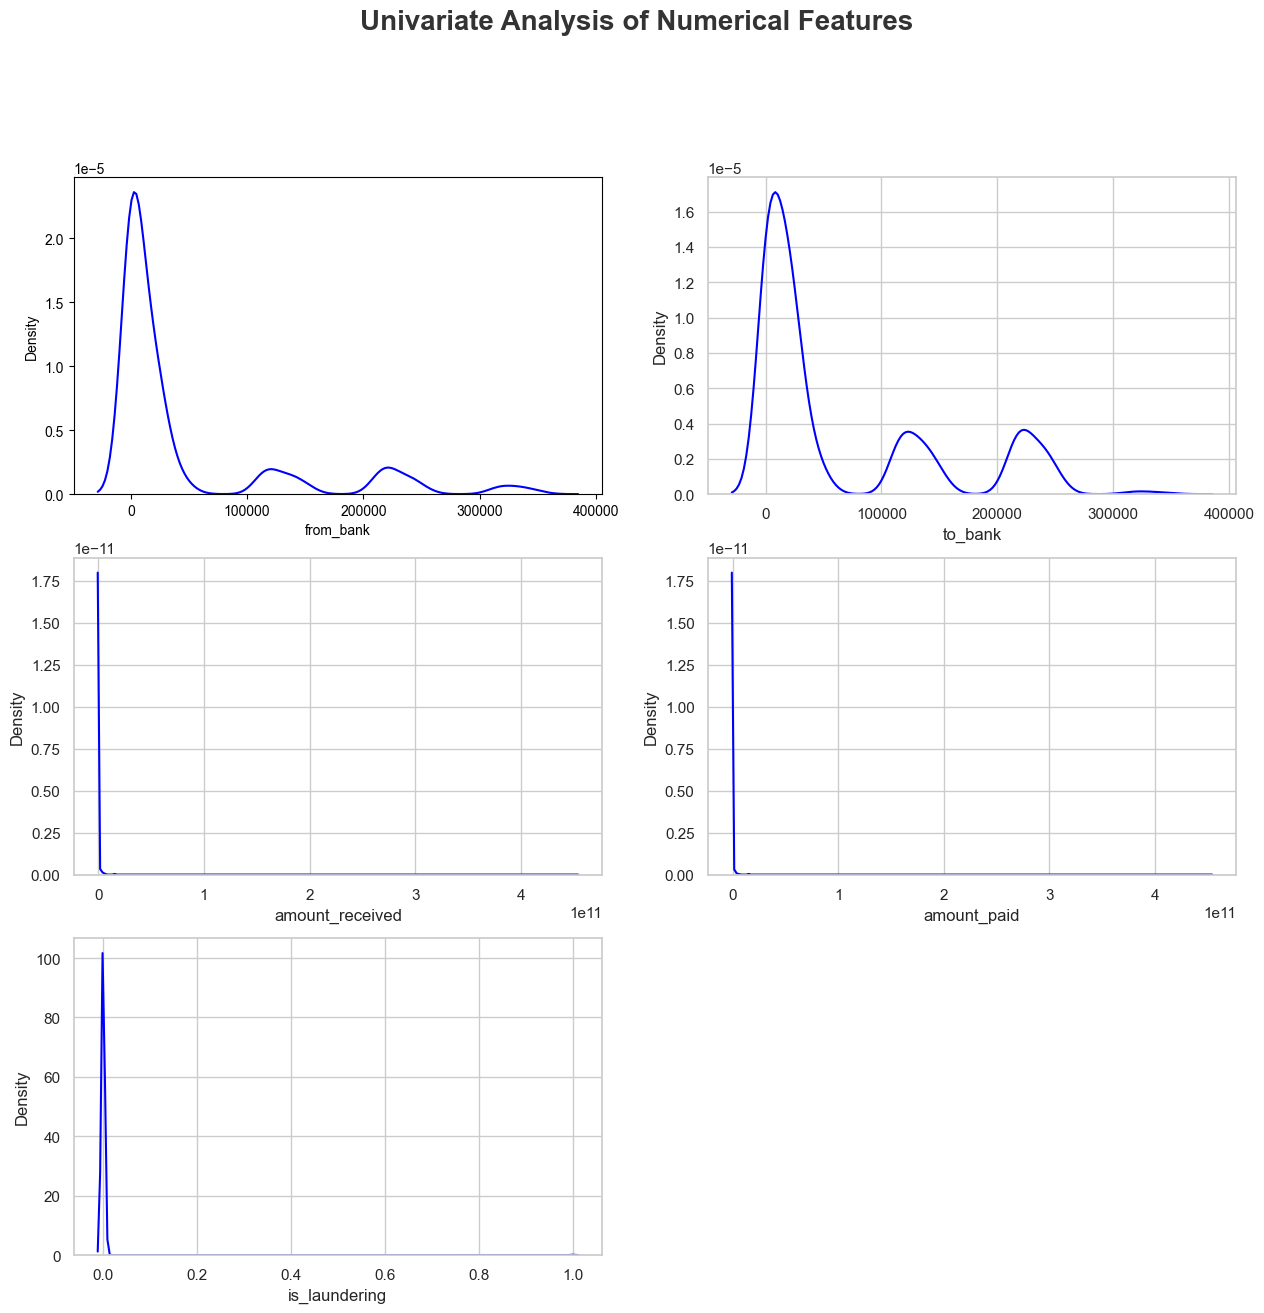

In [18]:
plt.figure(figsize=(15,14))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1)
for i in range(0, len(numeric_features)):
    plt.subplot(3, 2, i+1)
    sns.set_theme(style="whitegrid")
    ax = sns.kdeplot(x = df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])    

#### Catgegorical Features

In [19]:

# plt.figure(figsize=(15,15))
# plt.suptitle("Univariate Analysis of Categorical Features", fontsize=20, fontweight="bold", alpha=0.8, y=1)
# for i in range(0, len(categorical_features)):
#     plt.subplot(3, 2, i+1)
#     sns.set_theme(style="whitegrid")
#     ax = sns.countplot(x = df[categorical_features[i]], color='blue')
#     plt.xlabel(categorical_features[i])
    

##### Insights
- 

### Multivariate Analysis

#### Check Mutlicollinearity in Numerical features
- VIF is used to assess the multicollinearity among the independent (predictor) variables
- VIF measures how much the variance of a coefficient is inflated due to correlations with other predictors

In [20]:
df_numeric_features = df.select_dtypes(include=[np.number]).drop(columns = ["is_laundering"])
# Add a constant to the model
X = add_constant(df_numeric_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

           feature          VIF
0            const     1.738639
1        from_bank     1.087235
2          to_bank     1.087288
3  amount_received  2854.323471
4      amount_paid  2854.319113


##### Insights
- VIF = 1: No multicollinearity.
- 1 < VIF < 5: Moderate multicollinearity.
- VIF > 5: High multicollinearity.

- `amount_received` and `amount_paid` are high correlated, therefore one of them need to be droped.

#### Check Mutlicollinearity in Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e case_status

Null Hypothesis ($H_{0}$): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis ($H_{1}$): The Feature and target column are not independent (Correalted)

In [21]:
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['is_laundering'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,timestamp,Reject Null Hypothesis
1,account,Reject Null Hypothesis
2,account_1,Reject Null Hypothesis
3,receiving_currency,Fail to Reject Null Hypothesis
4,payment_currency,Fail to Reject Null Hypothesis
5,payment_format,Reject Null Hypothesis


##### Insights
- Here `receiving_currency` and `payement_curreny` fails to Rejects Null Hypothesis which means it doesn't correlate with target column.
- `receiving_currency` and `payement_curreny` are important features for model trainig and predictions

#### Distribution Numerical Features by Is Laundering?

In [22]:
# continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :', df_numeric_features.columns)

Num of continues features : Index(['from_bank', 'to_bank', 'amount_received', 'amount_paid'], dtype='object')


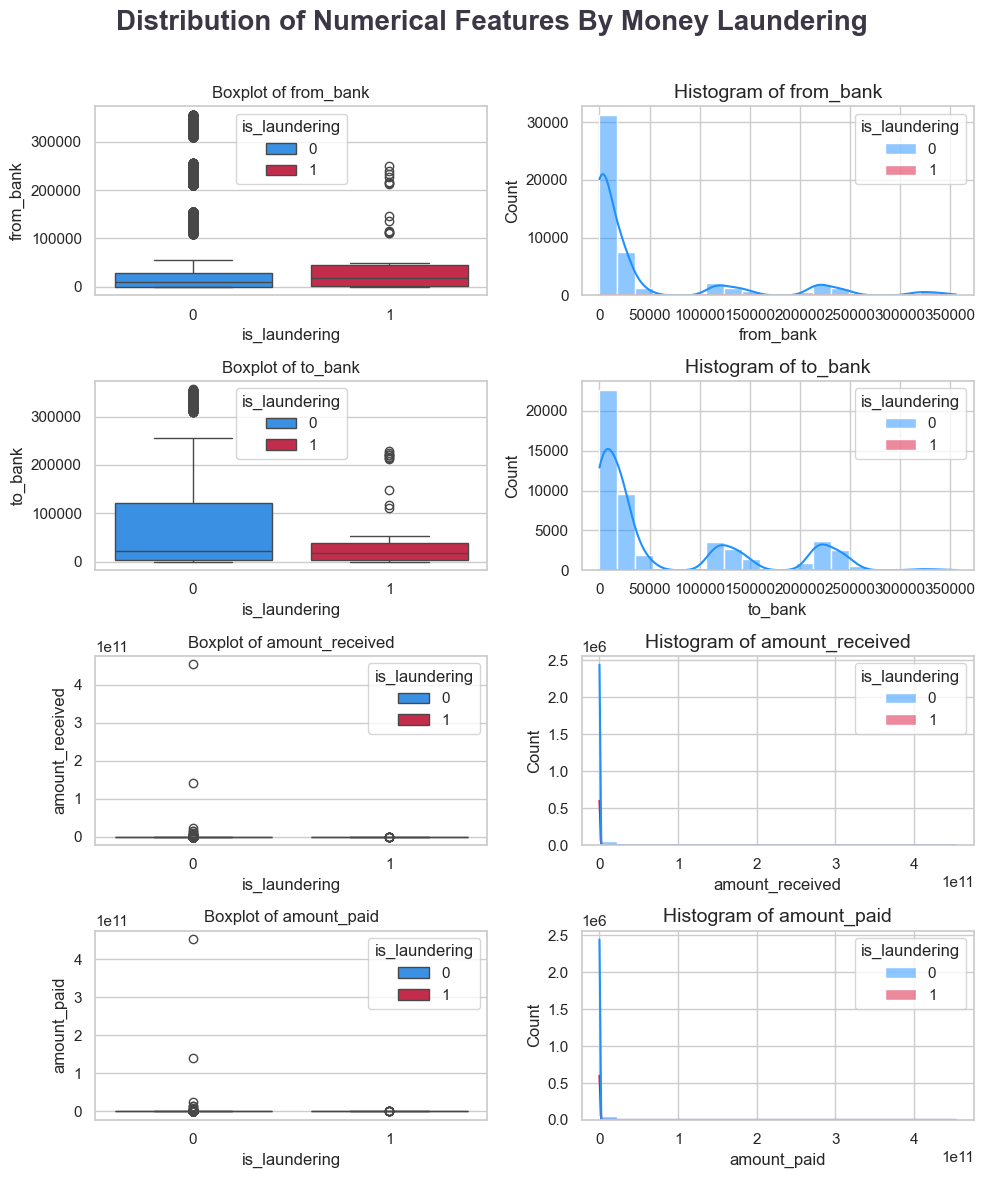

In [23]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(4, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Money Laundering', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(df_numeric_features.columns):   
    sns.boxplot(data=df, x='is_laundering', y=col,  hue='is_laundering', palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='is_laundering', bins=20, kde=True, multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

#### Initial Analysis Report
- `timestamp` column can be deleted because there are so many unique values
- `receiving_currency` and `payement_curreny` are important features for model trainig and predictions
- `amount_received` and `amount_paid` are high correlated, therefore one of them need to be droped.
- 

### 4.1 

is_laundering
0    49946
1       54
Name: count, dtype: int64


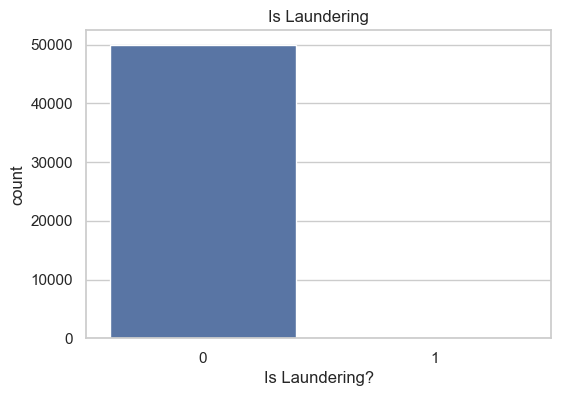

In [24]:
# Exploring the target variable "Is Laundering"
print(aml_trans_sm_df["is_laundering"].value_counts(dropna=False))

# Bar plot
plt.figure(figsize=(6,4))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_laundering", data=aml_trans_sm_df)
plt.title("Is Laundering")
plt.xlabel("Is Laundering?")
plt.show()

### Final Report
- 

## 5. Data preprocessing or Feature Engineering

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.model_selection import train_test_split

#### Train and Test dataset

In [26]:
#### Train and Test dataset split
train_df, test_df = train_test_split(aml_trans_sm_df, test_size=0.2, random_state=42)
train_df.head(2)

,timestamp,from_bank,account,to_bank,account_1,amount_received,receiving_currency,amount_paid,payment_currency,payment_format,is_laundering
1485112,2022/09/02 11:26,353132,814282F31,255063,814282BC1,0.02664,Bitcoin,0.02664,Bitcoin,Bitcoin,0
1258048,2022/09/02 04:29,29003,80B58DFD0,123390,80EC2ACA0,91604.31000,US Dollar,91604.31000,US Dollar,ACH,0


####  Independent features and Dependent variable

In [27]:
# Dividing into Independent features and Dependent feature
target_column_name = "is_laundering"
drop_columns = [target_column_name, "timestamp", "amount_paid"]
input_features_train_df = train_df.drop(columns=drop_columns, axis=1)
target_feature_train_df = train_df[target_column_name]

input_features_test_df = test_df.drop(columns=drop_columns, axis=1)
target_feature_test_df = test_df[target_column_name]

In [28]:
numerical_features = input_features_train_df.select_dtypes(include=np.number).columns.tolist()
print(numerical_features)
categorical_features = input_features_train_df.select_dtypes(include=object).columns.tolist()
print(categorical_features)

['from_bank', 'to_bank', 'amount_received']
['account', 'account_1', 'receiving_currency', 'payment_currency', 'payment_format']


#### Defining Pipeline

In [29]:
""" 
    - Preprocessing datasets for modeling
    - Imputing, Scaling and encoding  
"""
def num_cat_transformer(num_type, cat_object_type):
    # Preprocessing for numerical features:
    num_transformer = make_pipeline(SimpleImputer(strategy='median'),
                                    RobustScaler())

    # Preprocessing for categorical features:
    cat_transformer = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))

    ## Transforming both numerical and catergorical columns based preprocessing above
    column_transformer = make_column_transformer((num_transformer, numerical_features),
                                                 (cat_transformer, categorical_features),
                                                 remainder="passthrough")
    return column_transformer

#### Applying the column transformer to both Train and Test

In [30]:
column_transformer_tn = num_cat_transformer(numerical_features, categorical_features)
input_features_train_array = column_transformer_tn.fit_transform(input_features_train_df)
print("Encoded and Scaled of the Train dataset ")
display(pd.DataFrame(input_features_train_array).head())

input_features_test_array = column_transformer_tn.transform(input_features_test_df)
print("Encoded and Scaled of the Test dataset ")
display(pd.DataFrame(input_features_test_array).head())

Encoded and Scaled of the Train dataset 


,0,1,2,3,4,5,6,7
0,12.006860,1.981475,-0.113073,30792.0,35477.0,1.0,1.0,1.0
1,0.662969,0.864077,7.321705,22354.0,26319.0,12.0,12.0,0.0
2,4.667693,1.889222,0.061059,28169.0,31072.0,9.0,9.0,3.0
3,0.231617,-0.034063,8.689518,15524.0,11943.0,6.0,6.0,3.0
4,-0.344731,0.027249,0.501891,19608.0,16414.0,3.0,3.0,4.0


Encoded and Scaled of the Test dataset 


,0,1,2,3,4,5,6,7
0,0.828299,0.103183,1.227359,-1.0,-1.0,12.0,5.0,0.0
1,0.652154,0.853563,-0.099347,-1.0,-1.0,12.0,12.0,2.0
2,-0.349631,-0.072226,1.500295,1.0,-1.0,4.0,4.0,4.0
3,-0.351766,-0.182953,0.567904,-1.0,-1.0,6.0,6.0,2.0
4,-0.287229,-0.032578,-0.105046,-1.0,-1.0,12.0,12.0,3.0


In [31]:
# concatenating all input features and target feature along column wise
train_arr = np.c_[input_features_train_array, np.array(target_feature_train_df)]
test_arr = np.c_[input_features_test_array, np.array(target_feature_test_df)]

#### Save Train and Test data array

In [32]:
# Save the arrays separately
np.save('train_array.npy', train_arr)
np.save('test_array.npy', test_arr)

#### Load Train and Test data array

In [33]:
# Load individual arrays
loaded_train_array = np.load('train_array.npy')
loaded_test_array = np.load('test_array.npy')

In [34]:
# check
loaded_train_array

array([[12.00685962,  1.98147472, -0.11307259, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.66296854,  0.86407726,  7.32170486, ..., 12.        ,
         0.        ,  0.        ],
       [ 4.66769328,  1.88922173,  0.06105891, ...,  9.        ,
         3.        ,  0.        ],
       ...,
       [ 0.24033178,  0.81243052,  0.12487083, ...,  6.        ,
         2.        ,  0.        ],
       [-0.30854303,  1.60249154, -0.10773024, ..., 12.        ,
         6.        ,  0.        ],
       [ 0.39190845, -0.13078862, -0.01466758, ..., 12.        ,
         3.        ,  0.        ]])